In [1]:
from IPython.display import HTML, display
css_file_path = "../../design/custom.css"
styles = "<link rel='stylesheet' href='%s'>" % css_file_path
display(HTML(styles))

# Ejercicio: carteras con 4 activos

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

### Ejercicio 1

Con la siguiente matriz de varianza-covarianzas y las rentabilidades esperadas (medias), determina la desviación típica y la rentabilidad media de las carteras X e Y.

In [3]:
matriz_covarianzas = np.array([[0.10, 0.01, 0.03, 0.05],
                               [0.01, 0.30, 0.06, -0.04],
                               [0.03, 0.06, 0.40, 0.02],
                               [0.05,-0.04, 0.02, 0.50]])
print(matriz_covarianzas)

[[ 0.1   0.01  0.03  0.05]
 [ 0.01  0.3   0.06 -0.04]
 [ 0.03  0.06  0.4   0.02]
 [ 0.05 -0.04  0.02  0.5 ]]


In [4]:
rentabilidad_medias = np.array([0.06, 0.08, 0.1, 0.15])
print(rentabilidad_medias)

[0.06 0.08 0.1  0.15]


In [5]:
pesos_x = np.array([0.2, 0.3, 0.4, 0.1])
pesos_y = np.array([0.2, 0.1, 0.1, 0.6])
print(pesos_x)
print(pesos_y)

[0.2 0.3 0.4 0.1]
[0.2 0.1 0.1 0.6]


**Rentabilidad** de la cartera $E(\tilde R_p)=\sum_{i=1}^{N}w_i E(\tilde R_i)$

$E(\tilde R_p)=\begin{pmatrix}w_1 & w_2 & ... & w_N\end{pmatrix}  \begin{pmatrix}\mu_1 \\\mu_2  \\...  \\ \mu_N\end{pmatrix} = \mathbf{w}^T\mathbf{\mu}$

In [6]:
# TO-DO Calcula la rentabilidad media de las dos carteras
rentabilidad_medias.shape, pesos_x.shape
mu_x = pesos_x.T @ rentabilidad_medias
mu_y = pesos_y.T @ rentabilidad_medias

print("Rentabilidad media de cartera X: {:.4f}".format(mu_x))
print("Rentabilidad media de cartera Y: {:.4f}".format(mu_y))

Rentabilidad media de cartera X: 0.0910
Rentabilidad media de cartera Y: 0.1200


$\sigma²(\tilde R_p)=\begin{pmatrix}w_1 & w_2 & ... & w_N\end{pmatrix} \begin{pmatrix}\sigma_1^2 & \sigma_{12}^2 & ... & \sigma_{1N}^2\\ 
 \sigma_{21}^2& \sigma_2^2 &...  & \sigma_{2N}^2\\ ... & ... & ... & ...\\  \sigma_{N1}^2& \sigma_{N2}^2 & ... & \sigma_N^2\end{pmatrix} \begin{pmatrix}w_1 \\w_2  \\...  \\ w_N\end{pmatrix} = \mathbf{w}^T\mathbf{C}\mathbf{w}$

In [7]:
# TO-DO Calcula la desviación típica de las dos carteras
sigma2_x = pesos_x.T @ matriz_covarianzas @ pesos_x
sigma2_y = pesos_y.T @ matriz_covarianzas @ pesos_y

sigma_x = np.sqrt(sigma2_x)
sigma_y = np.sqrt(sigma2_y)

print("Desviación típica de cartera X: {:.4f}".format(sigma_x))
print("Desviación típica de cartera Y: {:.4f}".format(sigma_y))

Desviación típica de cartera X: 0.3487
Desviación típica de cartera Y: 0.4510


---

### Ejercicio 2

Determina la covarianza de las dos carteras X e Y.

$covar(X,Y)=\begin{pmatrix}x_1 & x_2 & ... & x_N\end{pmatrix} \begin{pmatrix}\sigma_1^2 & \sigma_{12}^2 & ... & \sigma_{1N}^2\\ 
 \sigma_{21}^2& \sigma_2^2 &...  & \sigma_{2N}^2\\ ... & ... & ... & ...\\  \sigma_{N1}^2& \sigma_{N2}^2 & ... & \sigma_N^2\end{pmatrix} \begin{pmatrix}y_1 \\y_2  \\...  \\ y_N\end{pmatrix} = \mathbf{X}^T\mathbf{C}\mathbf{Y}$

In [8]:
# TO-DO Calcula la covarianza entre las dos carteras X e Y
covar_XY = pesos_x.T @ matriz_covarianzas @ pesos_y

print("Covarianzas entre X e Y: {:.4f}".format(covar_XY))

Covarianzas entre X e Y: 0.0714


---

### Ejercicio 3

Crea una cartera en la que inviertes el 30% en la cartera X y el 70% restante en la cartera Y y determina su rentabilidad esperada y su desviación típica.

In [9]:
# TO-DO Define los pesos de la nueva cartera y calcula la rentabilidad media
pesos_new = np.array([0.3, 0.7])
mu_carteras = np.array([mu_x, mu_y])

mu_xy = pesos_new.T @ mu_carteras

print("Rentabilidad de la nueva cartera XY: {:.4f}".format(mu_xy))

Rentabilidad de la nueva cartera XY: 0.1113


In [10]:
# TO-DO Estima la matriz de varianzas-covarianzas
S_carteras = np.array([[sigma2_x, covar_XY], 
                       [covar_XY, sigma2_y]])
print(S_carteras)

[[0.1216 0.0714]
 [0.0714 0.2034]]


In [11]:
# TO-DO Calcula la desviación típica
sigma2_xy = pesos_new.T @ S_carteras @ pesos_new
sigma_xy = np.sqrt(sigma2_xy)
sigma_xy

print("Desviación típica de la nueva cartera XY: {:.4f}".format(sigma_xy))

Desviación típica de la nueva cartera XY: 0.3750


---

### Ejercicio 4

Genera 100 carteras empezando invirtiendo 0% de tu presupuesto en X hasta el 100% de tu presupuesto en X.

In [12]:
mus = []
sigmas = []

# TO-DO Genera 100 carteras cambiando sus pesos y calcula la media y desviación de cada una
for w_x in np.linspace(0.0, 1.0, 100):
    w_y = 1.0 - w_x
    
    pesos_new = np.array([w_x, w_y])
    mu_new = pesos_new.T @ mu_carteras
    sigma2_new = pesos_new.T @ S_carteras @ pesos_new
    sigma_new = np.sqrt(sigma2_new)
    
    mus.append(mu_new)
    sigmas.append(sigma_new)

Representa gráficamente las 100 carteras, dibujando además las dos carteras iniciales.

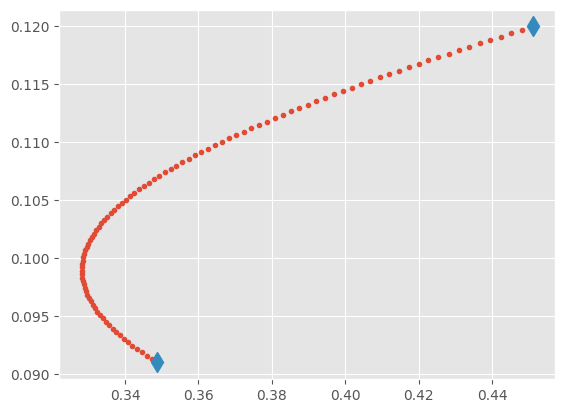

In [13]:
# TO-DO Dibuja las 100 carteras y las dos carteras iniciales
plt.plot(sigmas, mus, '.')
plt.plot([sigma_x, sigma_y], [mu_x, mu_y], 'd', markersize=10)
plt.show()

Genera una nueva figura añadiendo, además, los cuatro activos.

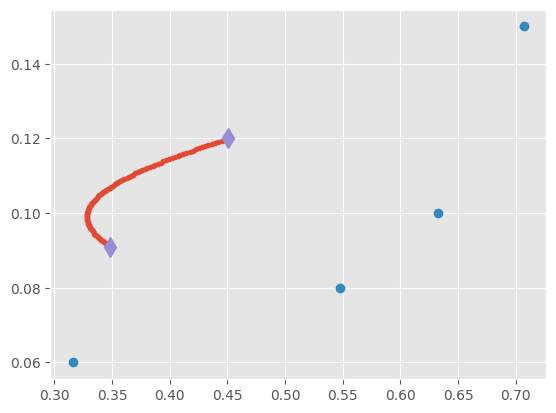

In [14]:
# TO-DO Vuelve a generar la figura añadiendo los 4 activos
plt.plot(sigmas, mus, '.')
plt.plot(np.sqrt(np.diag(matriz_covarianzas)), rentabilidad_medias, 'o')
plt.plot([sigma_x, sigma_y], [mu_x, mu_y], 'd', markersize=10)
plt.show()

---

### Ejercicio 5

Genera 10.000 carteras aleatorias, calcula sus rentabilidades medias y sus desviaciones típicas y represéntalas gráficamente junto a la figura anterior.

In [15]:
num_carteras = 10000
num_activos = 4

# TO-DO Genera las 10000 carteras aleatorias
pesos = np.random.rand(num_carteras * num_activos).reshape(num_carteras, num_activos)
pesos = pesos / pesos.sum(axis=1, keepdims=True)
pesos.shape

(10000, 4)

In [16]:
# TO-DO Calcula las rentabilidades y las desviaciones típicas
std_carteras = np.sqrt(np.diag((pesos @ matriz_covarianzas @ pesos.T)))
r_carteras = pesos @ rentabilidad_medias

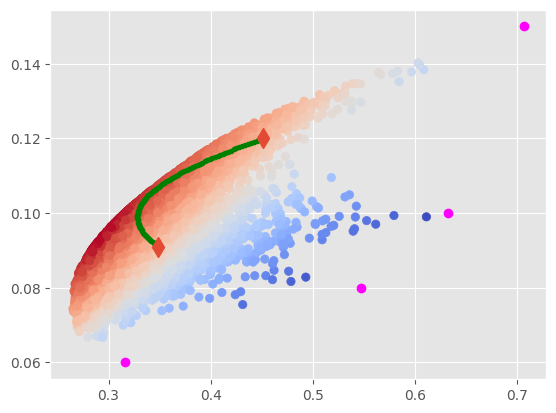

In [18]:
# TO-DO Añade a la figura previa las 10000 carteras 
plt.scatter(std_carteras, r_carteras, c=r_carteras / std_carteras, marker='o', cmap='coolwarm')
plt.plot(sigmas, mus, '.', color="green")
plt.plot([sigma_x, sigma_y], [mu_x, mu_y], 'd', markersize=10)
plt.plot(np.sqrt(np.diag(matriz_covarianzas)), rentabilidad_medias, 'o', color="magenta")
plt.show()